In [ ]:
import pandas as pd

df = pd.read_csv('steam_reviews.csv')

In [ ]:
df

,comment,positive,game
0,[h1] For me this is the end of the Night City ...,True,Cyberpunk 2077
1,Cyberpunk 2077 is a science fiction role playi...,True,Cyberpunk 2077
2,"This game has done so much for me, but thats p...",True,Cyberpunk 2077
3,"Probably my favorite game ever, Cyberpunk is a...",True,Cyberpunk 2077
4,Patch 1.5 made the game what it should have be...,True,Cyberpunk 2077
...,...,...,...
99843,Best rpg in recent years. Exceptionally polish...,True,Baldurs Gate 3
99844,Its a great story game with impactful choices....,True,Baldurs Gate 3
99845,Already in Love with this title. Absolutely on...,True,Baldurs Gate 3
99846,"Incredible game, and very friendly to non-D&D ...",True,Baldurs Gate 3


In [ ]:
df.dtypes

,0
comment,object
positive,bool
game,object


In [ ]:
df.isnull().sum()  # Eksik veri var mı?

,0
comment,3
positive,0
game,0


In [ ]:
df['positive'].value_counts()  # Sınıfların dengesi

,count
positive,
True,80417
False,19431


## Preprocess

In [ ]:
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 14.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Remove non-alphabetic characters
    text = re.sub(r"[^a-z\s]", "", text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords and apply stemming
    filtered = [stemmer.stem(word) for word in tokens if word not in stop_words and len(word) > 2]

    return " ".join(filtered)

In [ ]:
# Null commentleri kaldır
df.dropna(subset=["comment"], inplace=True)

df['clean_comment'] = df['comment'].astype(str).apply(preprocess_text)
df[['comment', 'clean_comment']].head()

,comment,clean_comment
0,[h1] For me this is the end of the Night City ...,end night citi stori complet task unlock end c...
1,Cyberpunk 2077 is a science fiction role playi...,cyberpunk scienc fiction role play game develo...
2,"This game has done so much for me, but thats p...",game done much that person bia cyberpunk launc...
3,"Probably my favorite game ever, Cyberpunk is a...",probabl favorit game ever cyberpunk game ill a...
4,Patch 1.5 made the game what it should have be...,patch made game releas ive done three playthro...


In [ ]:
df

,comment,positive,game,clean_comment
0,[h1] For me this is the end of the Night City ...,True,Cyberpunk 2077,end night citi stori complet task unlock end c...
1,Cyberpunk 2077 is a science fiction role playi...,True,Cyberpunk 2077,cyberpunk scienc fiction role play game develo...
2,"This game has done so much for me, but thats p...",True,Cyberpunk 2077,game done much that person bia cyberpunk launc...
3,"Probably my favorite game ever, Cyberpunk is a...",True,Cyberpunk 2077,probabl favorit game ever cyberpunk game ill a...
4,Patch 1.5 made the game what it should have be...,True,Cyberpunk 2077,patch made game releas ive done three playthro...
...,...,...,...,...
99843,Best rpg in recent years. Exceptionally polish...,True,Baldurs Gate 3,best rpg recent year except polish game true m...
99844,Its a great story game with impactful choices....,True,Baldurs Gate 3,great stori game impact choic good graphic ove...
99845,Already in Love with this title. Absolutely on...,True,Baldurs Gate 3,alreadi love titl absolut one greatest rpg eve...
99846,"Incredible game, and very friendly to non-D&D ...",True,Baldurs Gate 3,incred game friendli nondd player done first p...


## NLP

In [ ]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dropout, Dense, Bidirectional, GlobalAveragePooling1D, Input, Attention, LayerNormalization, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from keras.models import Model
from keras.optimizers import RMSprop, Nadam, Adam
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# GloVe 6B: 50d, 100d, 200d, 300d boyutlarında gelir
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-05-13 13:35:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-13 13:35:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-13 13:35:19--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# Parametreler
max_words = 10000
max_len = 100
embedding_dim = 300

texts = df['clean_comment'].tolist()
labels = df['positive'].astype(int).tolist()

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len)
y = np.array(labels)

word_index = tokenizer.word_index

# GloVe dosyası yolu
glove_path = "glove.6B.300d.txt"

In [ ]:
X

array([[   0,    0,    0, ...,    3,   40, 7811],
       [  60,    1,   75, ..., 1206,    2,    1],
       [   0,    0,    0, ...,   29,    1,    5],
       ...,
       [   0,    0,    0, ...,   37,   24,   71],
       [   0,    0,    0, ...,  357,    1,  174],
       [   0,    0,    0, ..., 2563,   30, 1876]], dtype=int32)

In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
def load_glove_embeddings(glove_path, word_index, embedding_dim=100, max_words=10000):
    """
    GloVe dosyasını okuyarak verilen word_index'e uygun embedding matrisi döner.

    Args:
        glove_path (str): GloVe dosyasının yolu (örn: "glove.6B.100d.txt")
        word_index (dict): Tokenizer'ın word_index sözlüğü
        embedding_dim (int): GloVe dosyasının embedding boyutu (örn: 50, 100, 200, 300)
        max_words (int): Maksimum kelime sayısı (embedding matrisinin boyutunu belirler)

    Returns:
        np.array: embedding_matrix [vocab_size, embedding_dim]
    """

    embeddings_index = {}
    with open(glove_path, encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            if len(values) != embedding_dim + 1:
                continue  # bozuk satır varsa atla
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector

    print(f"{len(embeddings_index):,} kelime vektörü yüklendi.")

    vocab_size = min(len(word_index) + 1, max_words)
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    for word, i in word_index.items():
        if i >= max_words:
            continue
        vector = embeddings_index.get(word)
        if vector is not None:
            embedding_matrix[i] = vector

    return embedding_matrix

In [ ]:
# Embedding matrisi oluştur
embedding_matrix = load_glove_embeddings(glove_path, word_index, embedding_dim, max_words)

400,000 kelime vektörü yüklendi.


In [ ]:
embedding_layer = Embedding(
    input_dim=max_words,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    trainable=True  # veya True: ince ayar için
)

In [ ]:
# Veriyi ayır (örnek olarak, %80 eğitim - %20 test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)

### Model definitions

In [ ]:
def build_rnn(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC']):
    model = Sequential([
        Embedding(max_words, 128),
        SimpleRNN(64),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [ ]:
def build_lstm(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC']):
    model = Sequential([
        Embedding(max_words, 128),
        LSTM(64),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [ ]:
def build_gru(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC']):
    model = Sequential([
        Embedding(max_words, 128),
        GRU(64),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [ ]:
def build_gru_improved(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC']):
    model = Sequential([
        # Embedding katmanı
        Embedding(max_words, 256),

        # Bidirectional GRU katmanı
        Bidirectional(GRU(64, return_sequences=True)),  # return_sequences=True, diğer katmanlara bilgi göndermeye devam eder
        Dropout(0.3),

        # Batch Normalization katmanı
        BatchNormalization(),

        # İkinci GRU katmanı
        GRU(64),
        Dropout(0.3),

        # Dense katmanı
        Dense(32, activation='relu'),  # ReLU, modelin non-linearity yeteneğini artırır
        Dropout(0.3),

        # Çıktı katmanı
        Dense(1, activation='sigmoid')  # Binary sınıflandırma için sigmoid
    ])

    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [ ]:
def build_cnn(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC']):
    model = Sequential([
        Embedding(max_words, 128),
        Conv1D(128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [ ]:
def build_bilstm(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC']):
    model = Sequential([
        Embedding(max_words, 128),
        Bidirectional(LSTM(64)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [ ]:
def build_bilstm_improved(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC']):
    model = Sequential([
        Embedding(max_words, 512),
        Bidirectional(LSTM(128, return_sequences=True)),  # Bidirectional LSTM
        Dropout(0.5),  # Dropout katmanı
        Bidirectional(LSTM(64)),  # İkinci Bidirectional LSTM katmanı
        Dropout(0.5),  # Dropout katmanı
        Dense(64, activation='relu'),  # Ekstra Dense katmanı
        Dropout(0.5),  # Dropout katmanı
        Dense(1, activation='sigmoid')  # Sonuç katmanı
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [ ]:
def build_bilstm_cnn(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC']):
    model = Sequential([
        Embedding(max_words, 128),
        Bidirectional(LSTM(64, return_sequences=True)),
        Conv1D(128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [ ]:
def build_bilstm_cnn_attention(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC']):
    inputs = Input(shape=(None,))
    x = Embedding(max_words, 128)(inputs)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Conv1D(128, kernel_size=5, activation='relu')(x)
    x = Attention()([x, x])
    x = GlobalMaxPooling1D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [ ]:
def build_gru_attention(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC']):
    inputs = Input(shape=(None,))
    x = Embedding(max_words, 128)(inputs)
    x = GRU(64, return_sequences=True)(x)
    x = Attention()([x, x])
    x = GlobalMaxPooling1D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [ ]:
def build_stacked_lstm(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC']):
    model = Sequential([
        Embedding(max_words, 128),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

### Plot history function

In [ ]:
import matplotlib.pyplot as plt

# Modelin history nesnesi fit fonksiyonundan dönerken alınmalı:
# örn: history = model.fit(...)

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Doğruluk grafiği
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Eğitim Doğruluğu')
    plt.plot(epochs, val_acc, 'go-', label='Doğrulama Doğruluğu')
    plt.title('Eğitim ve Doğrulama Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Kayıp grafiği
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Eğitim Kaybı')
    plt.plot(epochs, val_loss, 'go-', label='Doğrulama Kaybı')
    plt.title('Eğitim ve Doğrulama Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Evaluate function

In [ ]:
def evaluate_model_performance(model, history, X_val, y_val):
    # Grafik 1: Eğitim/Doğrulama Doğruluğu ve Kaybı
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Eğitim Doğruluğu')
    plt.plot(epochs, val_acc, 'go-', label='Doğrulama Doğruluğu')
    plt.title('Eğitim ve Doğrulama Doğruluğu')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Eğitim Kaybı')
    plt.plot(epochs, val_loss, 'go-', label='Doğrulama Kaybı')
    plt.title('Eğitim ve Doğrulama Kaybı')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Tahminler
    y_prob = model.predict(X_val)
    y_pred = (y_prob > 0.5).astype(int)

    # Metin tabanlı metrikler
    print("🔍 Model Performansı:")
    print(f"Accuracy : {accuracy_score(y_val, y_pred):.4f}")
    print(f"Precision: {precision_score(y_val, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_val, y_pred):.4f}")
    print(f"F1-Score : {f1_score(y_val, y_pred):.4f}")

    # Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred))
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

## Compare optimizers

In [ ]:
from keras.optimizers import (
    Adam,
    SGD,
    RMSprop,
    Adagrad,
    Adadelta,
    Adamax,
    Nadam,
    Ftrl
)

optimizers = [
    'adam',
    'sgd',
    'rmsprop',
    'adagrad',
    'adadelta',
    'adamax',
    'nadam',
    'ftrl'
]

In [ ]:
def compare_optimizers(build_fn, X_train, y_train, X_val, y_val, optimizers, epochs=10, batch_size=64):
    results = {}

    for opt in optimizers:
        print(f"\n🔁 Optimizer: {opt}")
        model = build_fn(optimizer=opt)

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            verbose=1,  # veya 1: eğitim çıktısını görmek istersen
            callbacks=[EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)]
        )

        y_pred = (model.predict(X_val) > 0.5).astype(int)
        y_prob = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred)
        rec = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        auc_score = roc_auc_score(y_val, y_prob)

        results[opt] = {
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1-Score': f1,
            'AUC': auc_score
        }

        print(f"✔ {opt} → Accuracy: {acc:.4f}, F1: {f1:.4f}, AUC: {auc_score:.4f}")

    return results

In [ ]:
results = compare_optimizers(build_bilstm, X_train, y_train, X_val, y_val, optimizers)


🔁 Optimizer: adam
Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - AUC: 0.8858 - accuracy: 0.8773 - loss: 0.3001 - val_AUC: 0.9520 - val_accuracy: 0.9122 - val_loss: 0.2149
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - AUC: 0.9640 - accuracy: 0.9264 - loss: 0.1842 - val_AUC: 0.9509 - val_accuracy: 0.9124 - val_loss: 0.2150
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - AUC: 0.9758 - accuracy: 0.9414 - loss: 0.1518 - val_AUC: 0.9461 - val_accuracy: 0.9114 - val_loss: 0.2290
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
✔ adam → Accuracy: 0.9122, F1: 0.9458, AUC: 0.9521

🔁 Optimizer: sgd
Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - AUC: 0.5183 - accuracy: 0.8007 - loss: 0.5272 - val_AUC: 0.5892 - val_accuracy: 0.8054 - val_loss: 0.4894
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - AUC: 0.5468 - accuracy: 0.8052 - loss: 0.4908 - val_AUC: 0.6062 - val_accuracy: 0.8054 - val_loss: 0.4885
Epoch 3/10

In [ ]:
import pandas as pd

results_df = pd.DataFrame(results).T
results_df.sort_values(by="AUC", ascending=False)

,Accuracy,Precision,Recall,F1-Score,AUC
adam,0.912164,0.940269,0.951377,0.945791,0.952140
nadam,0.910461,0.937129,0.952745,0.944873,0.951985
adamax,0.910662,0.937519,0.952559,0.944979,0.951774
rmsprop,0.905754,0.911743,0.977616,0.943531,0.951224
sgd,0.814262,0.813902,0.997451,0.896376,0.780059
adagrad,0.805398,0.805398,1.000000,0.892211,0.640439
adadelta,0.805398,0.805398,1.000000,0.892211,0.588042
ftrl,0.805398,0.805398,1.000000,0.892211,0.500000


# Hyperparameter tuning - GRU

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# GRU modelini oluşturan fonksiyon
def build_gru_model(embedding_dim=128,
                   gru_units_1=64,
                   gru_units_2=64,
                   dense_units=32,
                   dropout_rate=0.5,
                   learning_rate=0.001,
                   optimizer_name='adam'):

    model = Sequential([
        # Embedding katmanı
        Embedding(max_words, embedding_dim),
        # Bidirectional GRU katmanı
        Bidirectional(GRU(gru_units_1, return_sequences=True)),
        Dropout(dropout_rate),
        # Batch Normalization katmanı
        BatchNormalization(),
        # İkinci GRU katmanı
        GRU(gru_units_2),
        Dropout(dropout_rate),
        # Dense katmanı
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        # Çıktı katmanı
        Dense(1, activation='sigmoid')
    ])

    # Optimizer seçimi
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'AUC'])

    return model

# Hyperparameter tuning fonksiyonu
def hyperparameter_tuning(X_train, y_train, X_val, y_val):
    # Denenecek hyperparameter'lar
    param_grid = {
        'embedding_dim': [128, 256],
        'gru_units_1': [64, 128],
        'gru_units_2': [64, 128],
        'dense_units': [32, 64],
        'dropout_rate': [0.3, 0.5],
        'learning_rate': [0.001],
        'optimizer_name': ['adam'],
        'batch_size': [64],
        'epochs': [10]  # Hızlı test için düşük epoch sayısı kullanılıyor
    }

    # Grid üzerinde tüm kombinasyonları oluşturma
    grid = list(ParameterGrid(param_grid))
    print(f"Toplam {len(grid)} farklı kombinasyon test edilecek.")

    # Sonuçları saklamak için liste
    results = []

    # Early stopping için callback
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    # Her hyperparameter kombinasyonu için model eğitimi
    for i, params in enumerate(grid):
        print(f"\nKombinasyon {i+1}/{len(grid)}")
        print(f"Parametreler: {params}")

        # Parametreleri ayıklama
        batch_size = params.pop('batch_size')
        epochs = params.pop('epochs')

        # Modeli oluşturma
        model = build_gru_model(**params)

        # Eğitim başlangıç zamanı
        start_time = datetime.now()

        # Modeli eğitme
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping],
            verbose=1
        )

        # Eğitim bitiş zamanı
        end_time = datetime.now()
        training_time = (end_time - start_time).total_seconds()

        # Validasyon verisi üzerinde değerlendirme
        val_loss, val_acc, val_auc = model.evaluate(X_val, y_val, verbose=0)

        # Sonuçları kaydetme
        result = {
            'val_loss': val_loss,
            'val_acc': val_acc,
            'val_auc': val_auc,
            'training_time': training_time,
            'epochs_completed': len(history.history['loss']),
            **params,
            'batch_size': batch_size,
            'epochs': epochs
        }

        results.append(result)

        print(f"Validasyon loss: {val_loss:.4f}")
        print(f"Validasyon accuracy: {val_acc:.4f}")
        print(f"Validasyon AUC: {val_auc:.4f}")
        print(f"Eğitim süresi: {training_time:.2f} saniye")

    # Sonuçları DataFrame'e dönüştürme
    results_df = pd.DataFrame(results)

    # En iyi modeli bulma (validation AUC'ye göre)
    best_idx = results_df['val_auc'].idxmax()
    best_params = results_df.iloc[best_idx].to_dict()

    print("\nEn iyi model parametreleri:")
    for key, value in best_params.items():
        print(f"{key}: {value}")

    # En iyi modeli yeniden oluşturma
    batch_size = best_params.pop('batch_size')
    epochs = best_params.pop('epochs')
    training_time = best_params.pop('training_time')
    val_loss = best_params.pop('val_loss')
    val_acc = best_params.pop('val_acc')
    val_auc = best_params.pop('val_auc')
    epochs_completed = best_params.pop('epochs_completed')

    best_model = build_gru_model(**best_params)

    # Sonuç tablosunu kaydetme
    results_df.to_csv('hyperparameter_tuning_results.csv', index=False)

    # En iyi ve en kötü 5 modeli görselleştirme
    results_df_sorted = results_df.sort_values('val_auc', ascending=False)
    top_5 = results_df_sorted.head(5)
    bottom_5 = results_df_sorted.tail(5)

    plt.figure(figsize=(12, 8))

    # En iyi 5
    plt.subplot(2, 1, 1)
    plt.bar(range(5), top_5['val_auc'], color='green')
    plt.title('En İyi 5 Model (AUC)')
    plt.xticks(range(5), [f"Model {i+1}" for i in range(5)])

    # En kötü 5
    plt.subplot(2, 1, 2)
    plt.bar(range(5), bottom_5['val_auc'], color='red')
    plt.title('En Kötü 5 Model (AUC)')
    plt.xticks(range(5), [f"Model {i+1}" for i in range(5)])

    plt.tight_layout()
    plt.savefig('model_comparison.png')
    plt.show()

    return best_model, results_df

Toplam 32 farklı kombinasyon test edilecek.

Kombinasyon 1/32
Parametreler: {'batch_size': 64, 'dense_units': 32, 'dropout_rate': 0.3, 'embedding_dim': 128, 'epochs': 10, 'gru_units_1': 64, 'gru_units_2': 64, 'learning_rate': 0.001, 'optimizer_name': 'adam'}
Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - AUC: 0.8477 - accuracy: 0.8637 - loss: 0.3325 - val_AUC: 0.9497 - val_accuracy: 0.9092 - val_loss: 0.2194
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - AUC: 0.9609 - accuracy: 0.9232 - loss: 0.1925 - val_AUC: 0.9528 - val_accuracy: 0.9147 - val_loss: 0.2159
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - AUC: 0.9755 - accuracy: 0.9393 - loss: 0.1518 - val_AUC: 0.9495 - val_accuracy: 0.9136 - val_loss: 0.2261
Epoch 4/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - AUC: 0.9833 - accuracy: 0.9547 - loss: 0.1208 - val_AUC: 0.9437 - val_accuracy: 0.9092 - val_loss: 0.2468
Epoch 5/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - AUC: 0.9900 - accuracy: 0.9

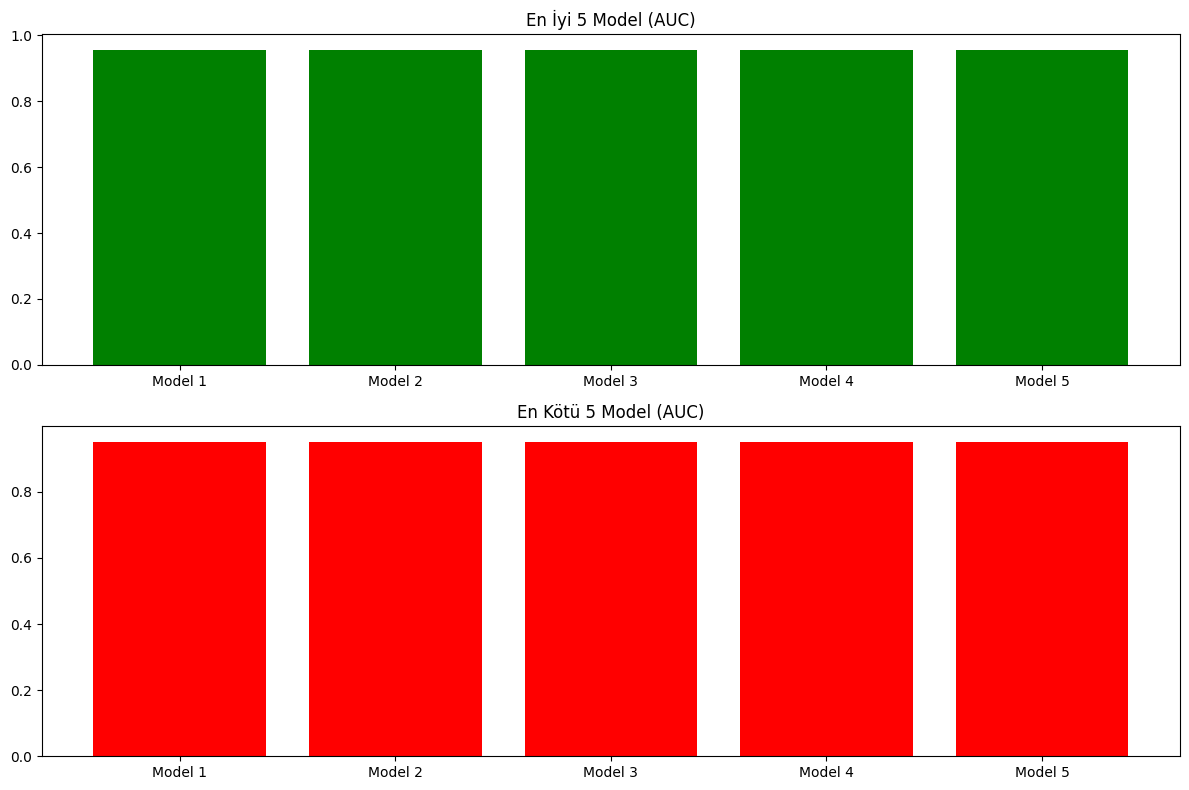

(<Sequential name=sequential_41, built=False>,
     val_loss   val_acc   val_auc  training_time  epochs_completed  \
 0   0.215870  0.914668  0.952808     187.093082                 5   
 1   0.215208  0.912214  0.950744     140.524550                 4   
 2   0.205823  0.916671  0.955515     186.546389                 5   
 3   0.207196  0.914117  0.954249     176.878876                 5   
 4   0.205347  0.915068  0.955517     167.221282                 5   
 5   0.217145  0.911713  0.952020     142.230637                 4   
 6   0.213216  0.914818  0.953030     190.778376                 5   
 7   0.213300  0.913867  0.953517     190.268822                 5   
 8   0.212539  0.914067  0.951792     183.082098                 5   
 9   0.211580  0.915519  0.952343     182.927214                 5   
 10  0.212906  0.913766  0.953543     186.637539                 5   
 11  0.212426  0.912464  0.951995     201.900774                 5   
 12  0.221000  0.913015  0.951924     196.6

In [ ]:
hyperparameter_tuning(X_train, y_train, X_val, y_val)

# Deep Learning

RNN

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - AUC: 0.7894 - accuracy: 0.8504 - loss: 0.3786 - val_AUC: 0.9189 - val_accuracy: 0.8999 - val_loss: 0.2638 - learning_rate: 0.0010
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - AUC: 0.9380 - accuracy: 0.9155 - loss: 0.2283 - val_AUC: 0.9322 - val_accuracy: 0.9045 - val_loss: 0.2478 - learning_rate: 0.0010
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - AUC: 0.9613 - accuracy: 0.9326 - loss: 0.1849 - val_AUC: 0.9217 - val_accuracy: 0.9002 - val_loss: 0.2749 - learning_rate: 0.0010
Epoch 4/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - AUC: 0.9751 - accuracy: 0.9476 - loss: 0.1466 - val_AUC: 0.9188 - val_accuracy: 0.9003 - val_loss: 0.2839 - learning_rate: 0.0010
Epoch 5/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - AUC: 0.9892 - accuracy: 0.9685 - loss: 0.0960 - val_AUC: 0.9175 - val_accuracy: 0.8961 - val_loss: 0.3135 - learning_rate: 1.0000e-04
Epoch 6/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step 

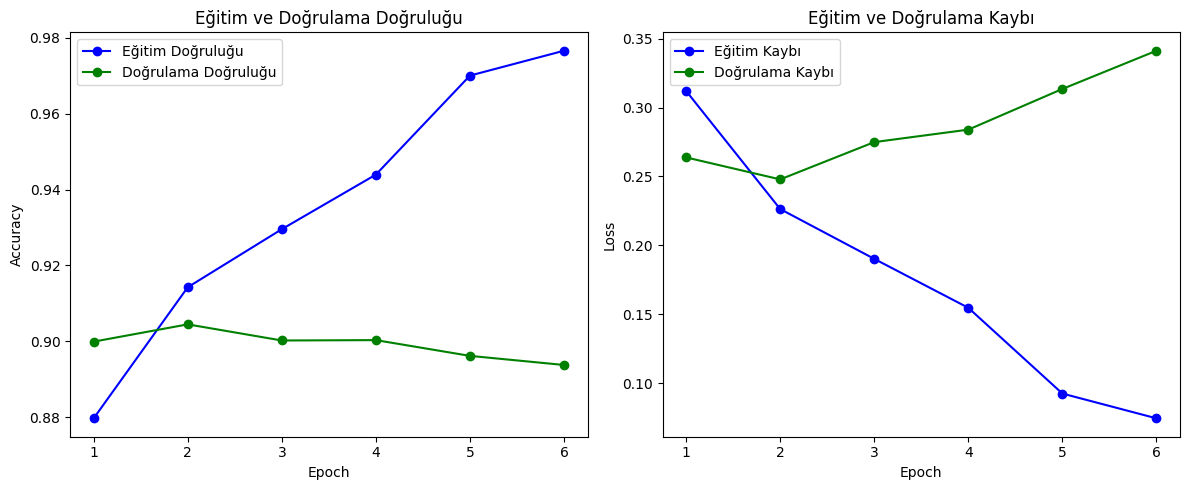

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
🔍 Model Performansı:
Accuracy : 0.9045
Precision: 0.9380
Recall   : 0.9438
F1-Score : 0.9409


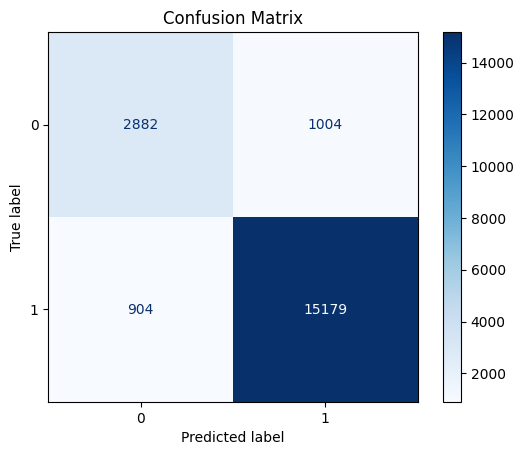

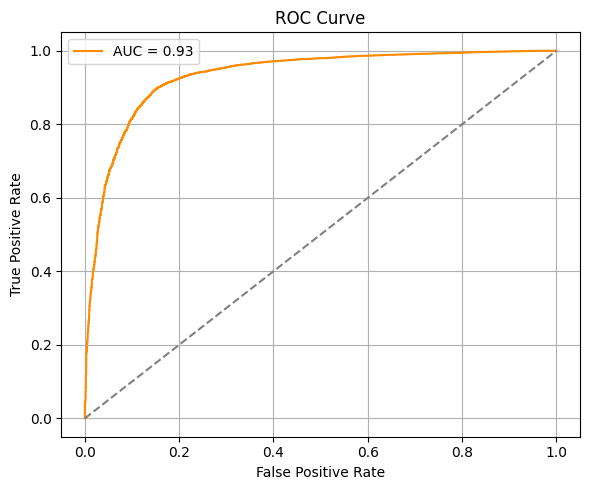

In [ ]:
rnn_model = build_rnn()
history = rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop, reduce_lr], verbose=1)

evaluate_model_performance(rnn_model, history, X_val, y_val)

LSTM

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - AUC: 0.8748 - accuracy: 0.8744 - loss: 0.3099 - val_AUC: 0.9482 - val_accuracy: 0.9102 - val_loss: 0.2192
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - AUC: 0.9624 - accuracy: 0.9280 - loss: 0.1859 - val_AUC: 0.9496 - val_accuracy: 0.9111 - val_loss: 0.2175
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - AUC: 0.9768 - accuracy: 0.9423 - loss: 0.1484 - val_AUC: 0.9449 - val_accuracy: 0.9080 - val_loss: 0.2281
Epoch 4/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - AUC: 0.9841 - accuracy: 0.9531 - loss: 0.1212 - val_AUC: 0.9379 - val_accuracy: 0.9079 - val_loss: 0.2617
Epoch 5/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - AUC: 0.9894 - accuracy: 0.9638 - loss: 0.0973 - val_AUC: 0.9306 - val_accuracy: 0.9057 - val_loss: 0.2936
Epoch 6/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - AUC: 0.9918 - accuracy: 0.9706 - loss: 0.0823 - val_AUC: 0.9205 - val_accuracy: 0.9010 - val_loss: 0.3200


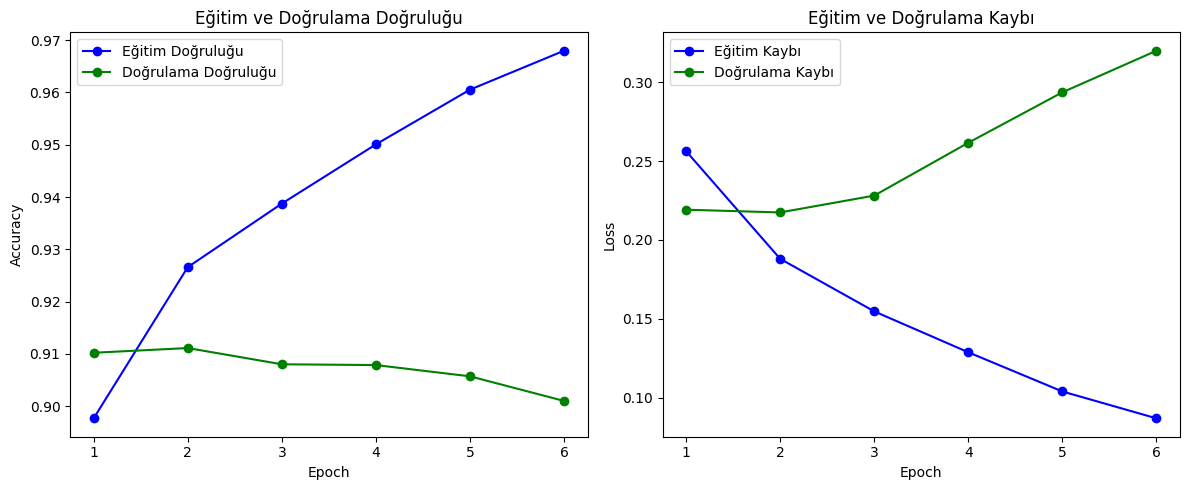

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
🔍 Model Performansı:
Accuracy : 0.9111
Precision: 0.9374
Recall   : 0.9533
F1-Score : 0.9453


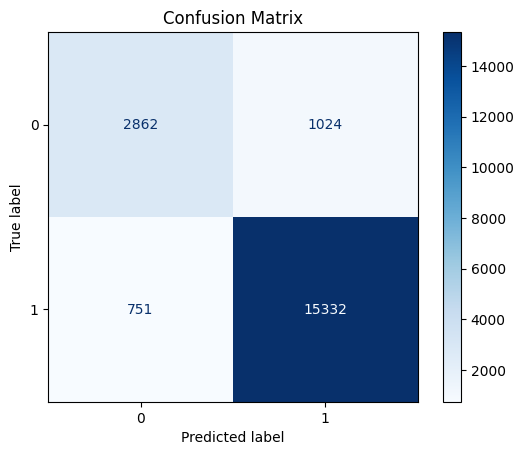

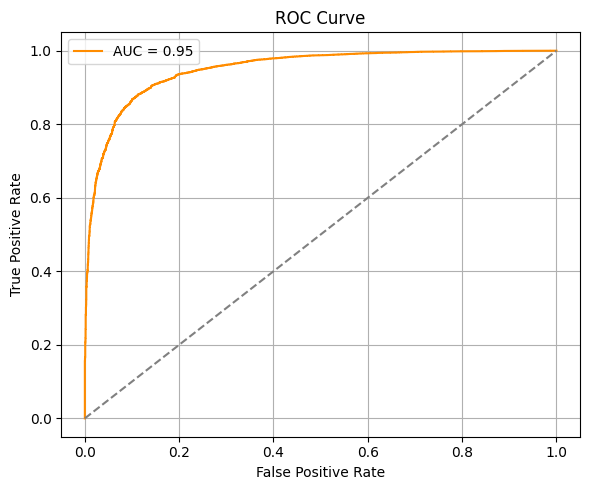

In [ ]:
lstm_model = build_lstm()
history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

evaluate_model_performance(lstm_model, history, X_val, y_val)

GRU

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 204s 161ms/step - accuracy: 0.8669 - loss: 0.3247 - val_accuracy: 0.9130 - val_loss: 0.2153
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 206s 165ms/step - accuracy: 0.9292 - loss: 0.1828 - val_accuracy: 0.9106 - val_loss: 0.2163
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 261s 164ms/step - accuracy: 0.9431 - loss: 0.1486 - val_accuracy: 0.9089 - val_loss: 0.2197
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step
🔍 GRU
Accuracy : 0.9130151735189543
Precision: 0.9345692475463467
Recall   : 0.9591494124230554
F1-Score : 0.9466998066832367


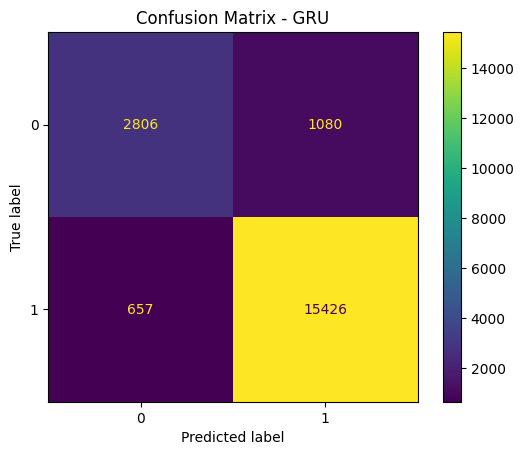

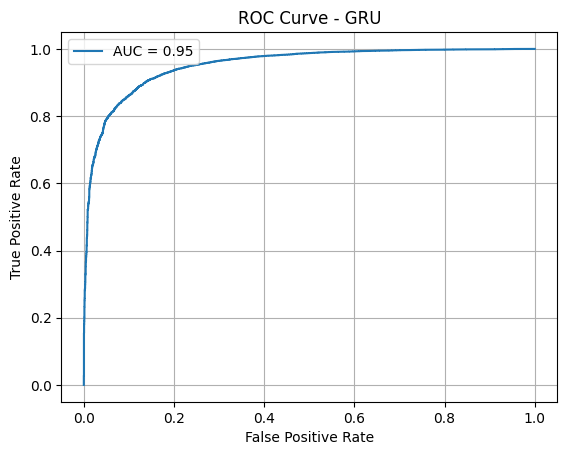

In [ ]:
gru_model = build_gru()
history = gru_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

evaluate_model_performance(gru_model, history, X_val, y_val)

GRU Improved

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - AUC: 0.8428 - accuracy: 0.8653 - loss: 0.3343 - val_AUC: 0.9525 - val_accuracy: 0.9109 - val_loss: 0.2198
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - AUC: 0.9611 - accuracy: 0.9240 - loss: 0.1917 - val_AUC: 0.9539 - val_accuracy: 0.9149 - val_loss: 0.2086
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - AUC: 0.9758 - accuracy: 0.9425 - loss: 0.1498 - val_AUC: 0.9453 - val_accuracy: 0.9118 - val_loss: 0.2311
Epoch 4/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - AUC: 0.9853 - accuracy: 0.9550 - loss: 0.1173 - val_AUC: 0.9369 - val_accuracy: 0.9061 - val_loss: 0.2642
Epoch 5/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - AUC: 0.9908 - accuracy: 0.9657 - loss: 0.0911 - val_AUC: 0.9294 - val_accuracy: 0.9044 - val_loss: 0.2839
Epoch 6/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - AUC: 0.9944 - accuracy: 0.9764 - loss: 0.0664 - val_AUC: 0.9143 - val_accuracy: 0.9058 - val_loss: 0.3474


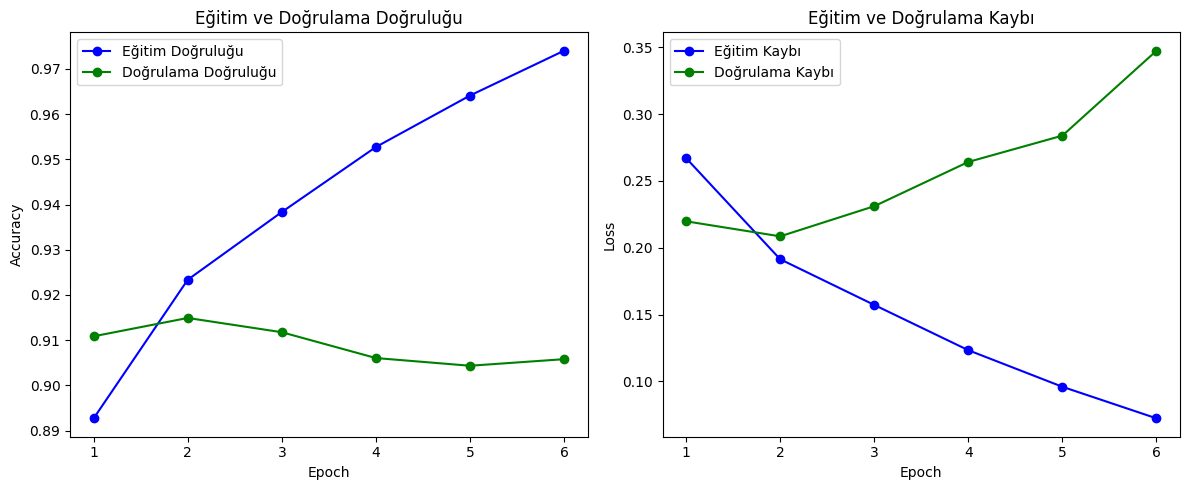

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
🔍 Model Performansı:
Accuracy : 0.9149
Precision: 0.9433
Recall   : 0.9516
F1-Score : 0.9474


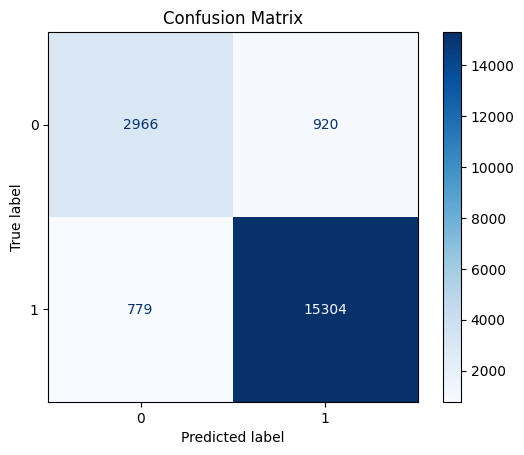

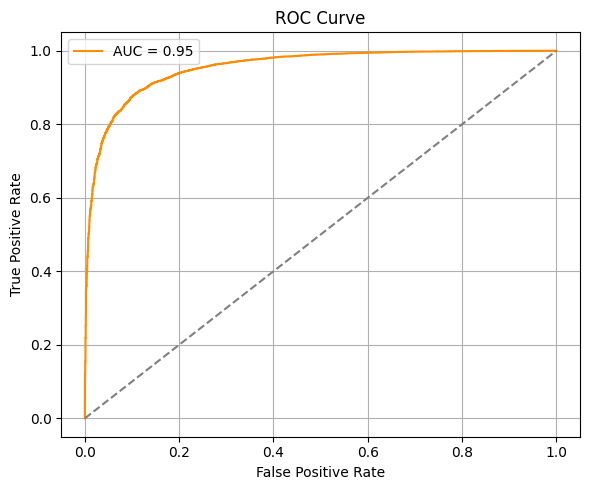

In [ ]:
gru_improved_model = build_gru_improved()
history = gru_improved_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

evaluate_model_performance(gru_improved_model, history, X_val, y_val)

CNN

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 127s 100ms/step - accuracy: 0.8603 - loss: 0.3334 - val_accuracy: 0.9050 - val_loss: 0.2281
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 138s 97ms/step - accuracy: 0.9165 - loss: 0.2070 - val_accuracy: 0.9085 - val_loss: 0.2256
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 142s 97ms/step - accuracy: 0.9380 - loss: 0.1605 - val_accuracy: 0.9087 - val_loss: 0.2325
Epoch 4/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 147s 101ms/step - accuracy: 0.9572 - loss: 0.1160 - val_accuracy: 0.9056 - val_loss: 0.2650


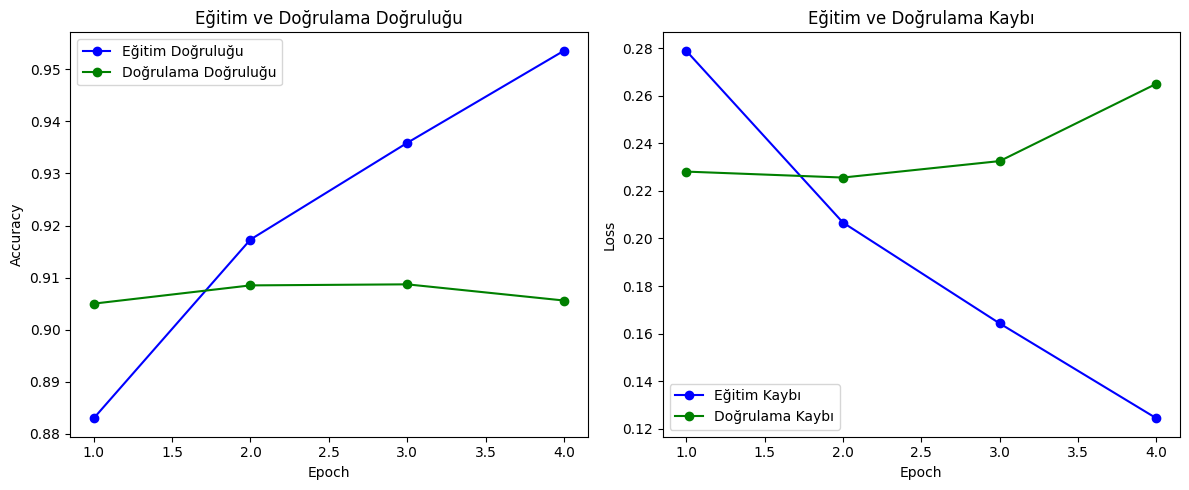

625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step
🔍 CNN
Accuracy : 0.9085081876909209
Precision: 0.9246901811248809
Recall   : 0.9649940931418268
F1-Score : 0.9444123284753704


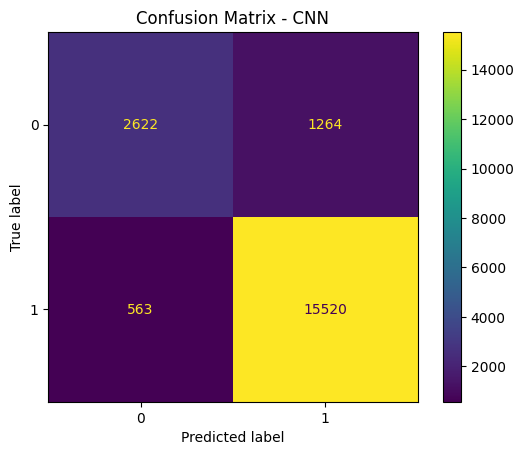

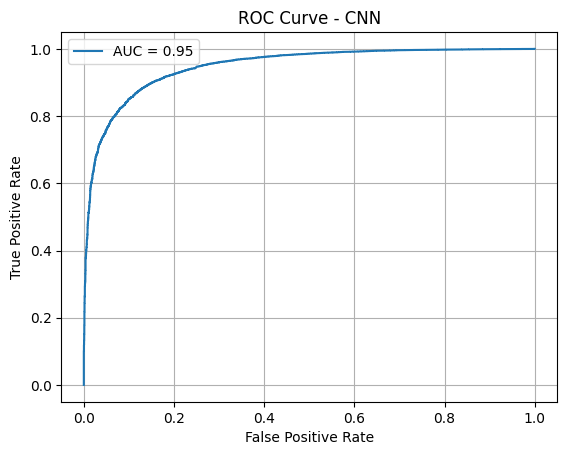

In [ ]:
cnn_model = build_cnn()
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

evaluate_model_performance(cnn_model, history, X_val, y_val)

BiLSTM

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 354s 280ms/step - accuracy: 0.8761 - loss: 0.3038 - val_accuracy: 0.9115 - val_loss: 0.2161
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 370s 270ms/step - accuracy: 0.9254 - loss: 0.1886 - val_accuracy: 0.9099 - val_loss: 0.2341
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 361s 289ms/step - accuracy: 0.9415 - loss: 0.1532 - val_accuracy: 0.9097 - val_loss: 0.2274


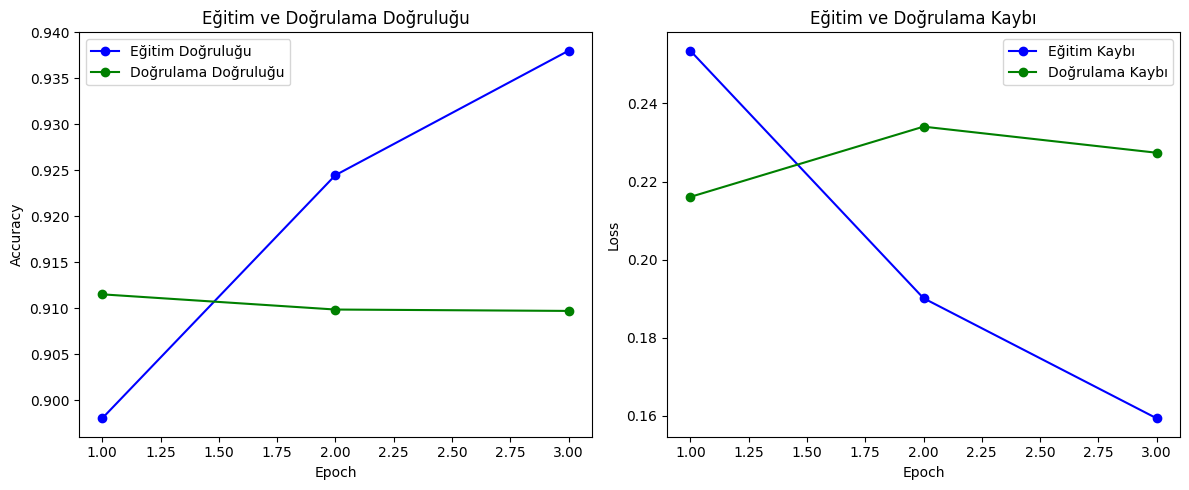

625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step
🔍 BiLSTM
Accuracy : 0.9115128449096099
Precision: 0.9447067594433399
Recall   : 0.9454703724429522
F1-Score : 0.9450884116970695


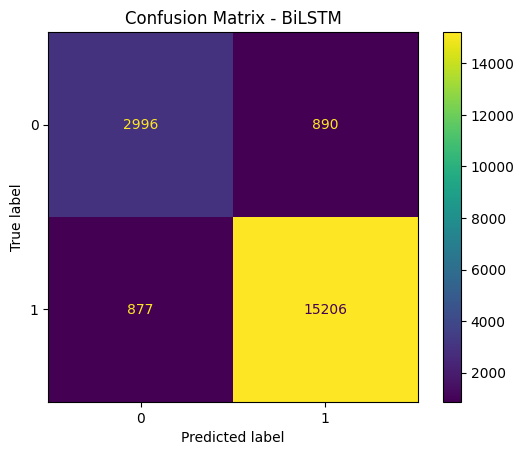

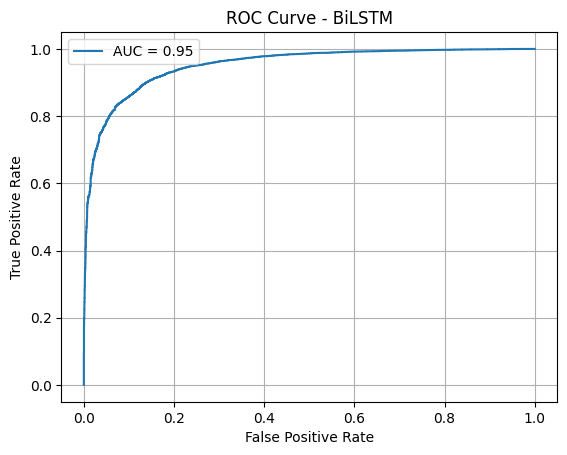

In [ ]:
bilstm_model = build_bilstm()
history = bilstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

evaluate_model_performance(bilstm_model, history, X_val, y_val)

Improved BiLSTM

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 52s 38ms/step - AUC: 0.8819 - accuracy: 0.8759 - loss: 0.3093 - val_AUC: 0.9503 - val_accuracy: 0.9132 - val_loss: 0.2203 - learning_rate: 0.0010
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - AUC: 0.9620 - accuracy: 0.9278 - loss: 0.1892 - val_AUC: 0.9489 - val_accuracy: 0.9134 - val_loss: 0.2250 - learning_rate: 0.0010
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - AUC: 0.9760 - accuracy: 0.9420 - loss: 0.1501 - val_AUC: 0.9360 - val_accuracy: 0.9134 - val_loss: 0.2718 - learning_rate: 0.0010
Epoch 4/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - AUC: 0.9880 - accuracy: 0.9625 - loss: 0.1029 - val_AUC: 0.9362 - val_accuracy: 0.9103 - val_loss: 0.2849 - learning_rate: 1.0000e-04
Epoch 5/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - AUC: 0.9925 - accuracy: 0.9703 - loss: 0.0813 - val_AUC: 0.9294 - val_accuracy: 0.9097 - val_loss: 0.3098 - learning_rate: 1.0000e-04


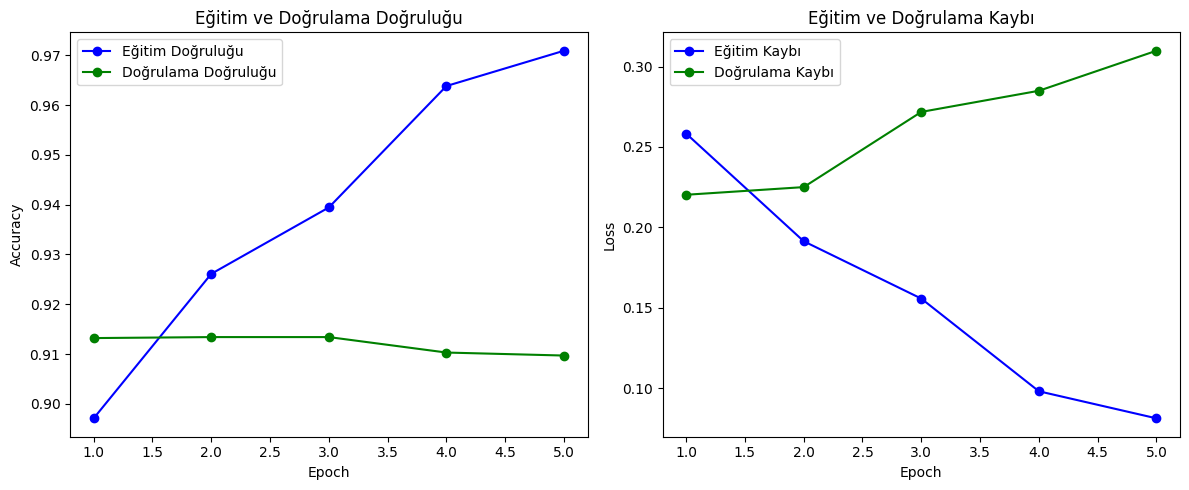

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
🔍 Model Performansı:
Accuracy : 0.9132
Precision: 0.9405
Recall   : 0.9526
F1-Score : 0.9465


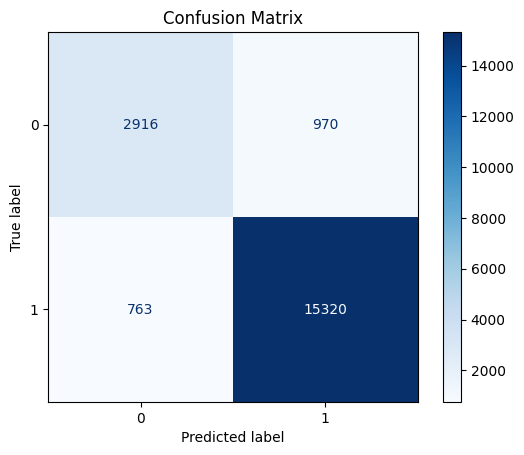

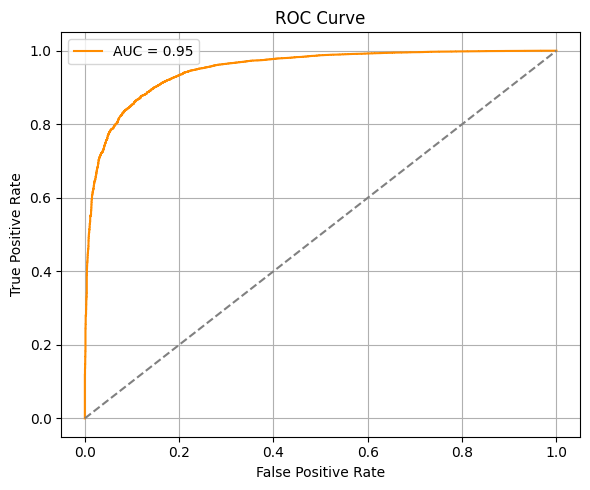

In [ ]:
bilstm_improved_model = build_bilstm_improved()
history = bilstm_improved_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop, reduce_lr], verbose=1)

evaluate_model_performance(bilstm_improved_model, history, X_val, y_val)

BiLSTM-CNN

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 447s 353ms/step - accuracy: 0.8824 - loss: 0.2911 - val_accuracy: 0.9124 - val_loss: 0.2096
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 450s 360ms/step - accuracy: 0.9303 - loss: 0.1767 - val_accuracy: 0.9140 - val_loss: 0.2121
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 449s 359ms/step - accuracy: 0.9452 - loss: 0.1423 - val_accuracy: 0.9124 - val_loss: 0.2258


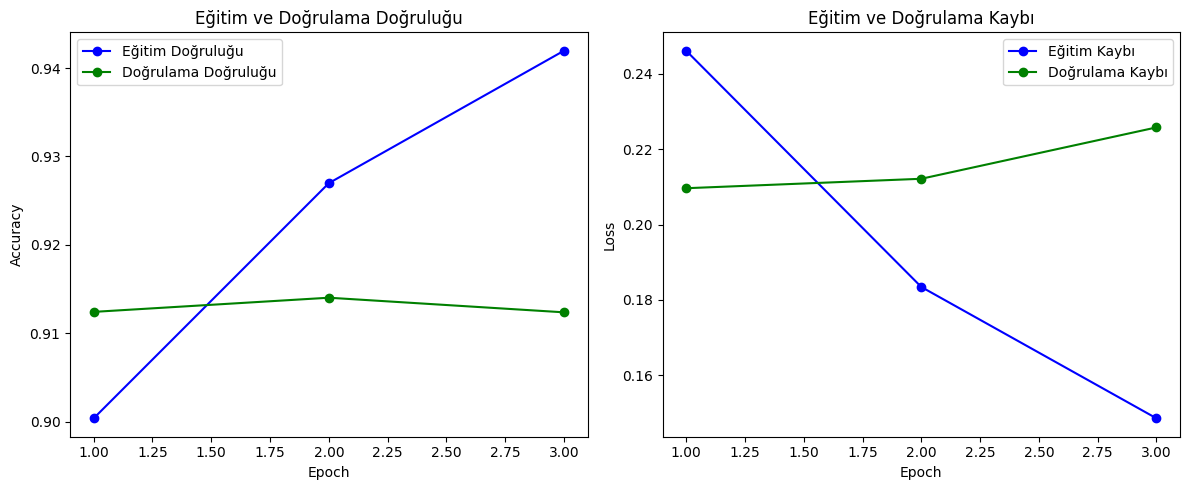

625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step
🔍 BiLSTM-CNN
Accuracy : 0.9124142420752166
Precision: 0.932319942091929
Recall   : 0.9610147360567058
F1-Score : 0.9464498943694314


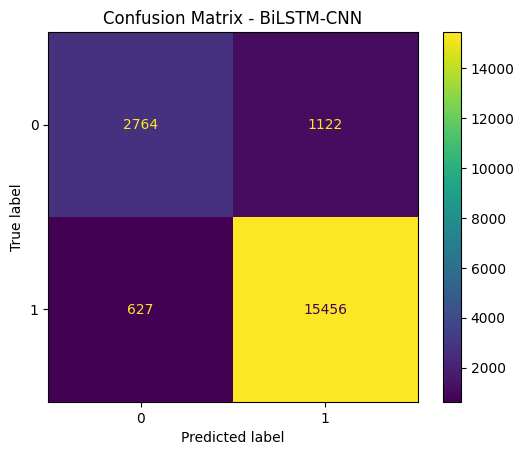

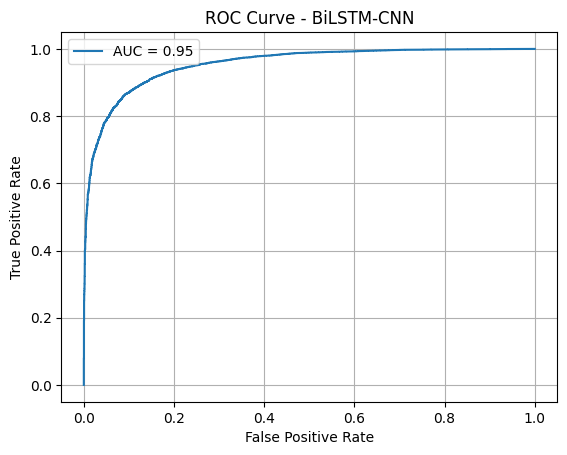

In [ ]:
bilstm_cnn_model = build_bilstm_cnn()
history = bilstm_cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

evaluate_model_performance(bilstm_cnn_model, history, X_val, y_val)

Bidirectional LSTM + Conv1D + Attention

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - AUC: 0.8630 - accuracy: 0.8680 - loss: 0.3201 - val_AUC: 0.9531 - val_accuracy: 0.9119 - val_loss: 0.2128
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - AUC: 0.9638 - accuracy: 0.9268 - loss: 0.1859 - val_AUC: 0.9545 - val_accuracy: 0.9134 - val_loss: 0.2107
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - AUC: 0.9767 - accuracy: 0.9422 - loss: 0.1487 - val_AUC: 0.9477 - val_accuracy: 0.9132 - val_loss: 0.2361
Epoch 4/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - AUC: 0.9852 - accuracy: 0.9550 - loss: 0.1185 - val_AUC: 0.9423 - val_accuracy: 0.9055 - val_loss: 0.2490


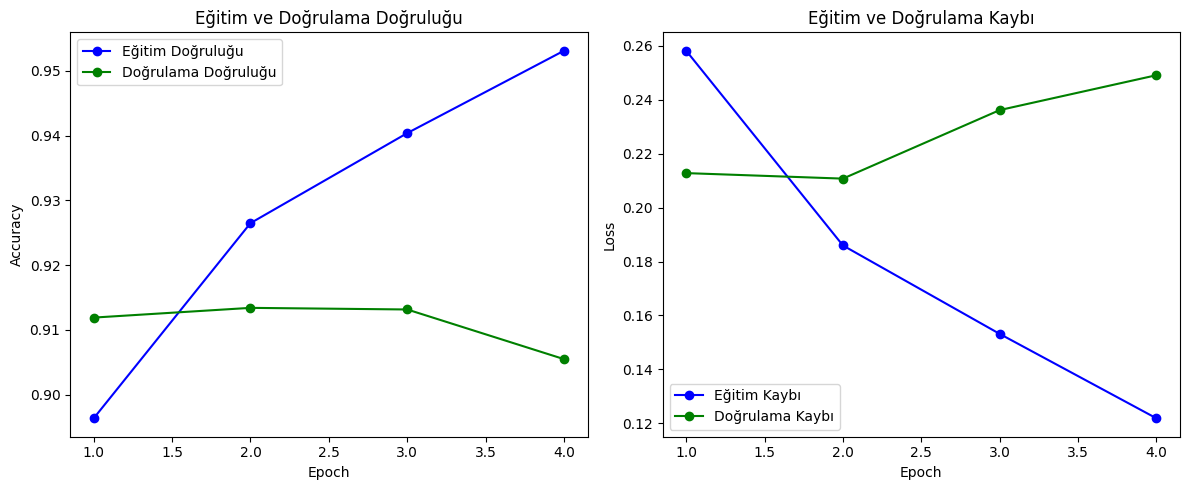

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
🔍 Model Performansı:
Accuracy : 0.9134
Precision: 0.9410
Recall   : 0.9522
F1-Score : 0.9466


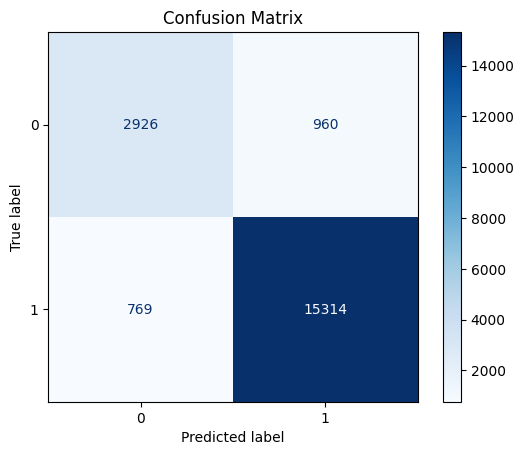

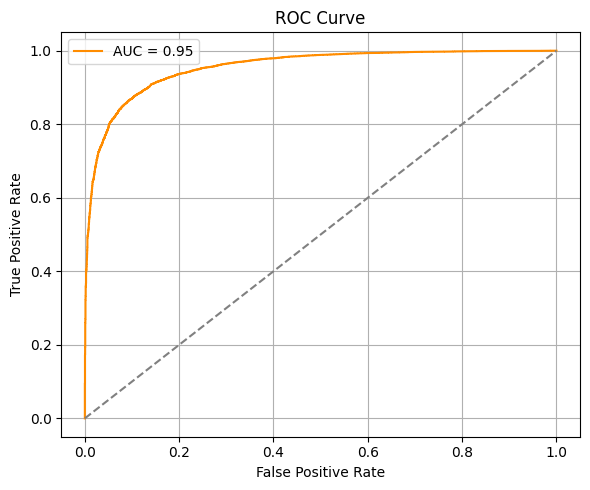

In [ ]:
bilstm_cnn_attention_model = build_bilstm_cnn_attention()
history = bilstm_cnn_attention_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

evaluate_model_performance(bilstm_cnn_attention_model, history, X_val, y_val)

GRU + Self-Attention

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - AUC: 0.8434 - accuracy: 0.8599 - loss: 0.3360 - val_AUC: 0.9481 - val_accuracy: 0.9087 - val_loss: 0.2233
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - AUC: 0.9590 - accuracy: 0.9219 - loss: 0.1957 - val_AUC: 0.9519 - val_accuracy: 0.9113 - val_loss: 0.2148
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - AUC: 0.9713 - accuracy: 0.9357 - loss: 0.1652 - val_AUC: 0.9509 - val_accuracy: 0.9116 - val_loss: 0.2180
Epoch 4/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - AUC: 0.9801 - accuracy: 0.9495 - loss: 0.1351 - val_AUC: 0.9450 - val_accuracy: 0.9099 - val_loss: 0.2349


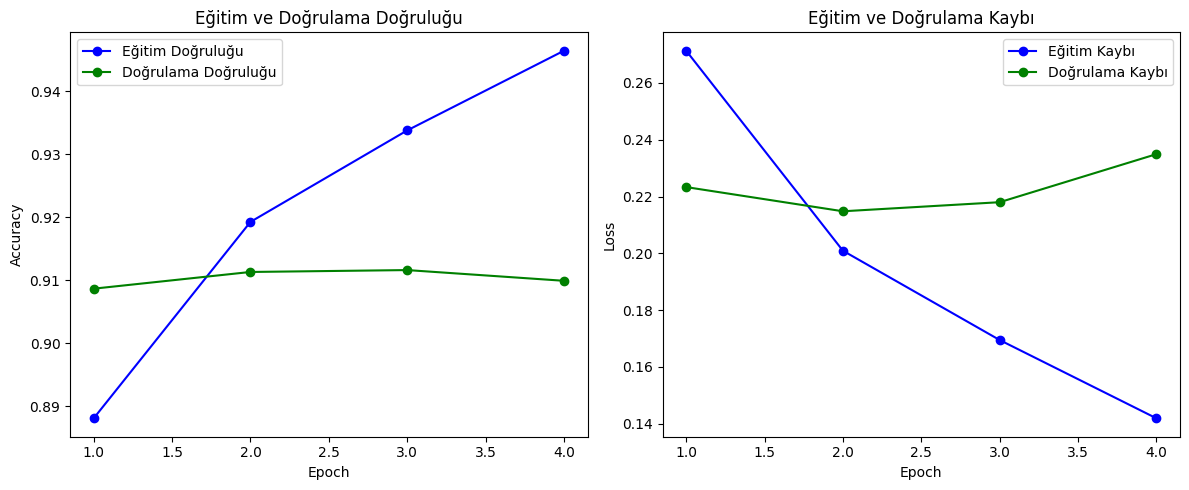

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
🔍 Model Performansı:
Accuracy : 0.9113
Precision: 0.9413
Recall   : 0.9491
F1-Score : 0.9452


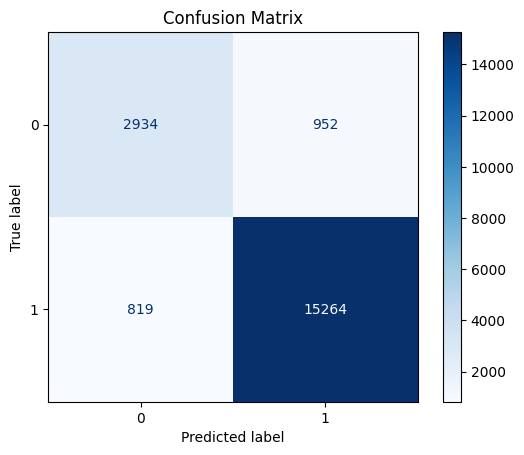

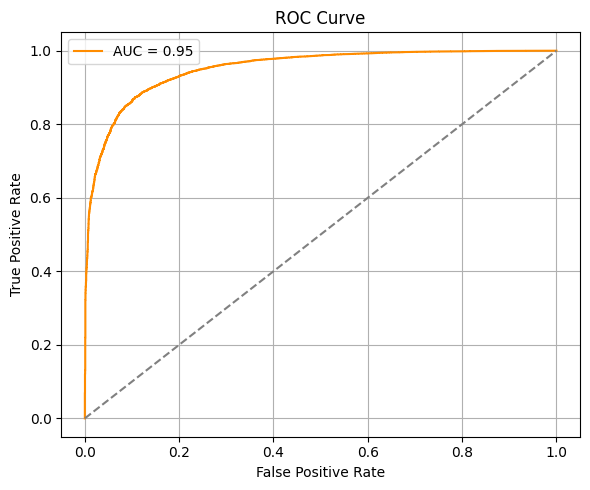

In [ ]:
gru_attention_model = build_gru_attention()
history = gru_attention_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

evaluate_model_performance(gru_attention_model, history, X_val, y_val)

Stacked LSTM (2 LSTM katmanı)

Epoch 1/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - AUC: 0.8771 - accuracy: 0.8711 - loss: 0.3157 - val_AUC: 0.9508 - val_accuracy: 0.9123 - val_loss: 0.2163
Epoch 2/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - AUC: 0.9634 - accuracy: 0.9261 - loss: 0.1853 - val_AUC: 0.9496 - val_accuracy: 0.9071 - val_loss: 0.2205
Epoch 3/10
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - AUC: 0.9760 - accuracy: 0.9419 - loss: 0.1518 - val_AUC: 0.9462 - val_accuracy: 0.9086 - val_loss: 0.2344


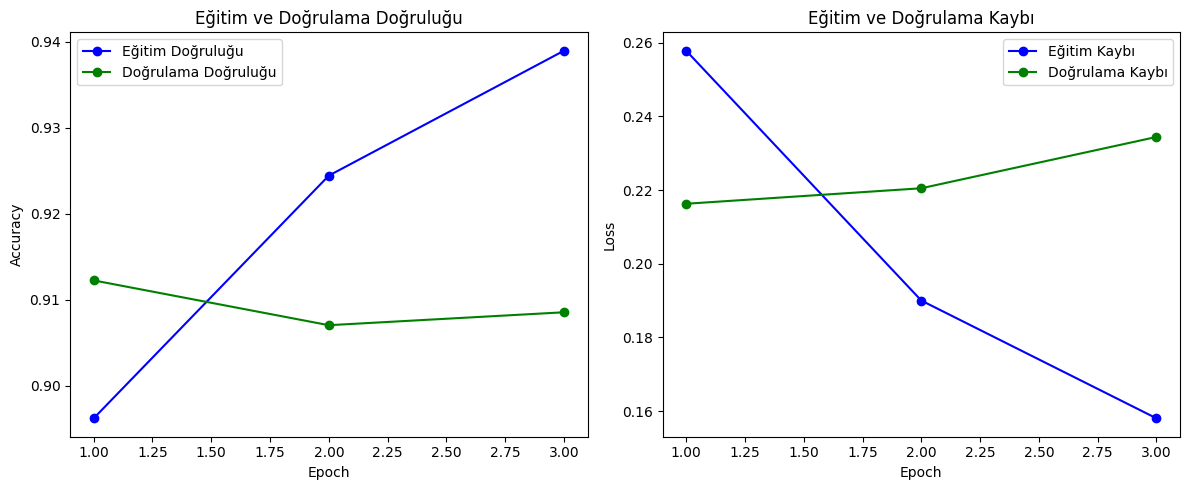

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
🔍 Model Performansı:
Accuracy : 0.9123
Precision: 0.9364
Recall   : 0.9560
F1-Score : 0.9461


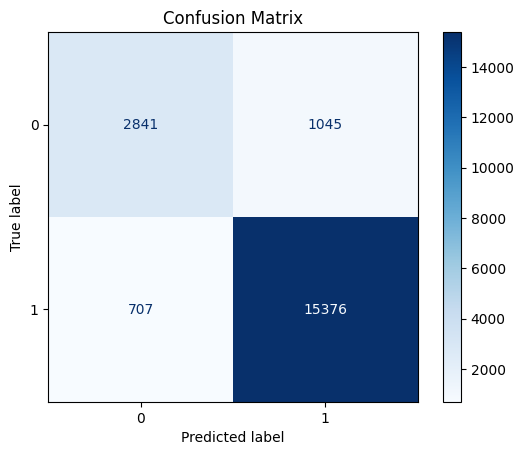

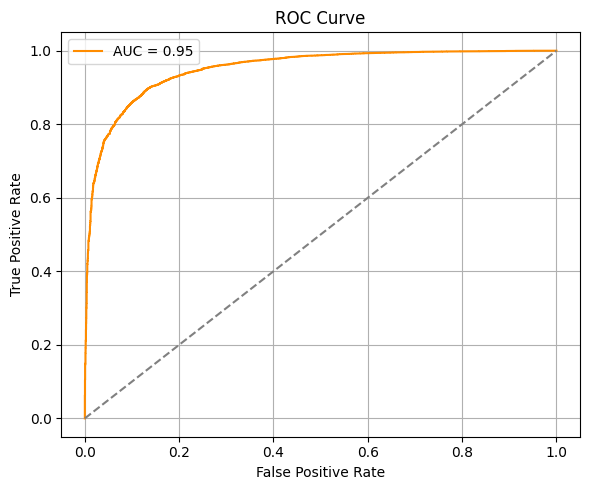

In [ ]:
stacked_lstm_model = build_stacked_lstm()
history = stacked_lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stop], verbose=1)

evaluate_model_performance(stacked_lstm_model, history, X_val, y_val)